# Zadání úkolů
## Úkol 1
V souboru s daty na Slacku máš data o hodnotách finančních indikátorů 100 největších společností obchodovaných na americké burze. Naším cílem je zjistit, které indikátory nejvíce ovlivňují cenu, a vytvořit model, který odhadne cenu akcie na základě hodnot finančních indikátorů.

Jeden z indikátorů je označený jako Y a je poměrem ceny a účetní hodnoty akcie. Hodnota indikátoru je odrazem ceny akcie. Ostatní indikátory jso následující:

- běžná likvidita (Current Ratio, CR),
- zadluženost (Debt to Assets, DA),
- finanční páka (Financial Leverage, FL)
- provozní zisková marže (Operating Profit Margin, OPM),
- obrat pohledávek (Receivables Turnover, RT),
- obrat celkových aktiv (Total Assets Turnover, TAT).

- Úkol můžeš odevzdat jako Jupyter notebook.
- Nenahrávej prosím datový soubor na GitHub (neobsahuje veřejně dostupná data). Ze stejného důvodu jsou - data anonymizovaná, tj. není v nich obsažen konkrétní název firmy.

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

data = pd.read_csv("df.csv")
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical


### Část 1
#### Otázka 1
- Vytvoř korelační matici a podívej se, který ukazatel má největší vliv na indikátor Y akcie.

#### Korelace

V reálném světě se často stává, že nějaká skutečnost má vliv na něco jiného. Například čas strávený studiem má vliv na body.

K zobrazení použijeme bodový graf (*scatter plot*). Na vodorovné ose máme průměrný čas strávený studiem a na svislé ose průměrný počet bodů. Vidíme, že známka má tendenci růst s tím, jak roste čas strávený studiem. Současně je patrný jistý vliv náhody. Takové závislosti se říká stochastická závislost (*stochastic dependence*). Dále platí, že závislost je lineární (*linear*), tj. kdybychom ho chtěly popsat pomocí matematické funkce, mohli bychom použít přímku.

Takové závislosti říkáme **korelace** (*correlation*) a to, jak je závislost silná, můžeme popsat pomocí **korelačního koeficientu** (*correlation coefficient*). Pro jeho hodnoty platí následující:

- Hodnoty blízko +1 znamenají silnou přímou lineární závislost, tj. hodnoty v obou sloupcích rostou současně.
- Hodnoty blízko 0 znamenají lineární nezávislost.
- Hodnoty blízko -1 znamenají silnou nepřímou lineární závislost, tj. jedna hodnota roste a současně druhá klesá.

Příklady přímé závislosti: čas strávený studiem a výsledek v testu, délka tréninku a výsledek v závodě, délka praxe a výše mzdy atd. Příklady nepřímé závislosti: množství vypitého alkoholu a kognitivní schopnosti, zimní teploty a spotřeba energie na vytápění.

Hodnotu korelace zjistíme pomocí metody `corr()` pro zvolenou tabulku.

In [2]:
#data_corr = data.drop(columns=["Company", "Sector"]) #vyhození nečíslených sloupců
#data_corr.head()

In [3]:
#vytvoření korelační matice s vyloučením nečíselných sloupců
data.corr(numeric_only=True)

,CR,DA,FL,OPM,RT,TAT,DE,Y,PT
CR,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665,-0.141136,-0.018690,-0.040483
DA,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691,0.464786,0.164599,-0.120993
FL,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169,0.968612,0.759323,0.032588
OPM,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701,-0.050014,0.051308,0.021409
RT,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580,-0.065267,-0.046290,0.097708
TAT,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000,0.094869,0.301222,0.017872
DE,-0.141136,0.464786,0.968612,-0.050014,-0.065267,0.094869,1.000000,0.724604,-0.025348
Y,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222,0.724604,1.000000,-0.001363
PT,-0.040483,-0.120993,0.032588,0.021409,0.097708,0.017872,-0.025348,-0.001363,1.000000


finanční páka (Financial Leverage, FL) -> 0.759323

### Část 2
#### Otázka 2
- Vytvoř regresní model, který bude mít koeficient Y jako vysvětlovanou proměnnou. Do modelu vlož hodnoty ostatních indikátorů jako vysvětlující proměnné.

#### Graf distribuce hodnot

<AxesSubplot: xlabel='Y', ylabel='Count'>

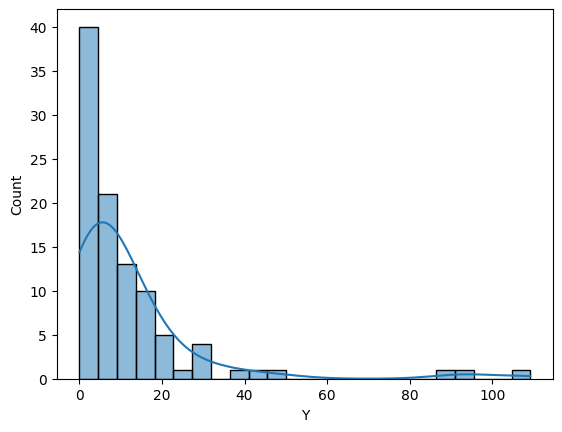

In [4]:
sns.histplot(data["Y"], kde=True)

In [5]:
# Definice vysvětlované a vysvětlujících proměnných pomocí formuláře
formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"

# Vytvoření a trénovámí modelu pomocí formuláře
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.45e-18
Time:                        08:44:32   Log-Likelihood:                -375.94
No. Observations:                 100   AIC:                             769.9
Df Residuals:                      91   BIC:                             793.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.0176      5.347     -2.061      0.042     -21.638      -0.397
CR             1.5014      1.240      1.211      0.229      -0.961       3.964
DA            -5.2206      9.370     -0.557      0.579     -23.834      13.392
FL             3.0104      1.060      2.840      0.006       0.905       5.116
OPM           23.4665      8.076      2.906      0.005       7.425      39.508
RT            -0.0063      0.021     -0.300      0.765      -0.048       0.035
TAT            8.4254      2.351      3.584      0.001       3.756      13.095
DE            -0.7283      2.066     -0.352      0.725      -4.833       3.376
PT            -0.0644      0.096     -0.669      0.505      -0.256       0.127
==============================================================================
Omnibus:                       29.136   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.551
Skew:                           0.881   Prob(JB):                     8.88e-23
Kurtosis:                       7.611   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Otázka 3
- S využitím modulu statsmodels vytvoř regresní model a zobraz si tabulku se souhrnem významů. Podívej se na hodnoty koeficientů a na výsledky testu statistické významnosti koeficientů. Pokud je některý koeficient (nebo více koeficientů) nevýznamný, sestav nový model bez tohoto koeficientů (případně beze všech nevýznamných koeficientů).

P-hodnota > 0.05 -> statisticky nevýznamné => CR, DA, RT, DE, PT

In [6]:
formula = "Y ~ FL + OPM + TAT"

mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     59.51
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           7.99e-22
Time:                        08:44:32   Log-Likelihood:                -377.99
No. Observations:                 100   AIC:                             764.0
Df Residuals:                      96   BIC:                             774.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4188      2.865     -3.637      0.000     -16.106      -4.732
FL             2.5281      0.208     12.149      0.000       2.115       2.941
OPM           24.8478      7.542      3.295      0.001       9.878      39.818
TAT            8.5518      2.205      3.879      0.000       4.176      12.928
==============================================================================
Omnibus:                       26.748   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.291
Skew:                           0.876   Prob(JB):                     2.71e-17
Kurtosis:                       6.904   Cond. No.                         50.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- V řádku `intercept` máme hodnotu, která určuje, kde funkce protne se svislou osou.

#### Vyhodnocení kvality modelu

Regresní model nevysvětlí data dokonale. Regresní modely se mezi sebou liší podle toho, jak dobře vysvětlovanou proměnnou dokážou vysvětlit. Abychom tuto skutečnost dokázali vysvětlit, vznikl ukazatel označovaný jako koeficient determinace (*coefficient of determination*, *R-squared*). Ten říká, kolik procent variability (různorodosti) vysvětlované proměnné (v našem případě ceny akcie) dokážeme pomocí našeho modelu vysvětlit. Koeficient determinace je číslo mezi 0 a 1 a platí, že čím vyšší koeficient determinace je, tím lépe náš model naše data popisuje.

Model se v matematických vzorcích často značí $R^2$, v naší tabulce je označen jako `R-squared`. Vidíme, že náš model má koeficient determinace 0.65, dokáže tedy vysvětlit přibližně 65 % variability cen akcií.

#### Graf distribuce reziduí

Reziduální hodnoty jsou rozdíly mezi pozorovanými hodnotami a hodnotami predikovanými modelem. Pokud má model dobré přizpůsobení datům, rezidua by měla být náhodně rozložená kolem nuly.

Pro regresi je dále důležité, aby rezidua měla normální rozdělení. Pro testování normality je možné využít standardní testy, modul `statsmodels` nám nabízí výsledky dvou testů: Omnibus testu a Jarque-Bera testu. Oba fungují na základě tvaru distribuční funice - šikmosti (jak moc je hustota symetrická) a špičatosti (jak rychle hustota od středu klesá). Poskytnuté p-hodnoty jsou vždy označené jako `Prob.`.

Normalita reziudí nám umožní použít řady údajů, které nám modul vypočítal. Dvě z nich jsou následující:

- `F-statistic` - testuje hypotézu, zda je model statisticky významný jako celek. To oceníme hlavně v případě modelu s více proměnnými. Pokud by byla p-hodnota více než 0.05, je model statisticky nevýznamný (tj. nic nám neříká).
- `P>|t|` - testuje hypotézu, zda je statisticky významný konkrétní koeficient (o něm už jsme mluvili). 

Použít ale můžeme základní měřítko kvality modelu, což je koeficient determinace `R-squared`. Ten nám říká, kolik procet rozptylu vysvětlované proměnné jsme naším modelem vysvětlili.

<AxesSubplot: ylabel='Count'>

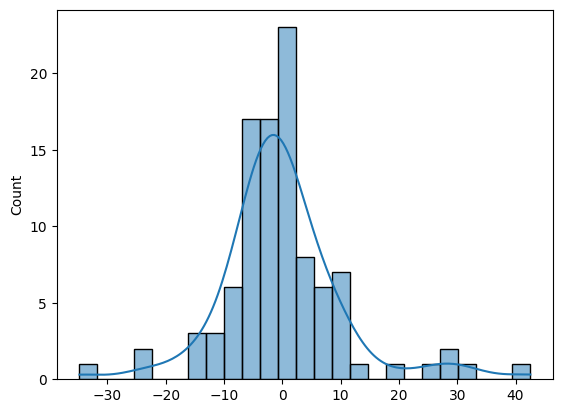

In [7]:
sns.histplot(res.resid, kde=True)

#### Otázka 4
- Pro všechna data odhadni ukazatel Y s využitím tvého modelu a odhadnuté ceny vlož do původní tabulky s daty. Dále vypočítej rozdíl mezi odhadem koeficientu a jeho skutečnou hodnotou. Najdi akcii, kde je tento rozdíl největší (tj. hledáme akcii, které náš model predikuje výrazně vyšší cenu než jaká je ve skutečnosti, tato akcie je potenciálně na trhu podhodnocená).

In [8]:
data_to_predict = data[["FL", "OPM", "TAT"]]
data_to_predict.head()

,FL,OPM,TAT
0,2.21,0.0770,0.40
1,10.14,0.2037,0.36
2,1.43,0.3055,0.72
3,3.55,0.0708,1.80
4,0.00,0.1677,0.93


In [9]:
data["Y_Predicted"] = res.predict()
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_Predicted
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358


In [10]:
data["Y_difference"] = data["Y_Predicted"] - data["Y"]
data.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_Predicted,Y_difference
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials,0.502359,-1.447641
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,16.096512
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services,6.944718,-0.835282
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive,15.708512,9.538512
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical,1.701358,1.701358


#### Regresní graf predikovaných a skutečných hodnot

<AxesSubplot: xlabel='Y_Predicted', ylabel='Y'>

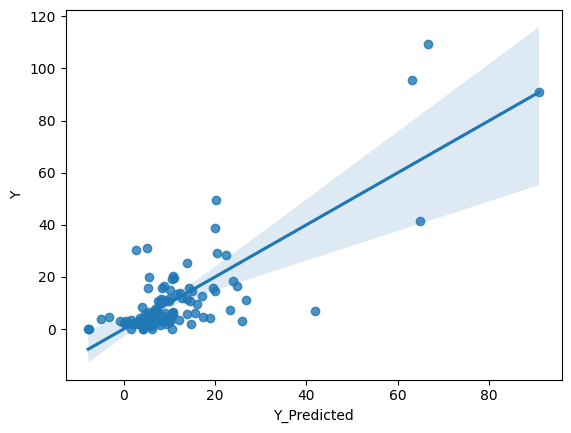

In [11]:
sns.regplot(data, x="Y_Predicted", y="Y")

- **Body dat**: Body na grafu reprezentují skutečné hodnoty "Y" a odpovídající předpovězené hodnoty "Y_Predicted". Každý bod představuje jedno pozorování v datech. Pokud by model byl dokonalý, všechny body by ležely na regresní přímce.

- **Regresní přímka**: Regresní přímka na grafu ukazuje ideální vztah mezi skutečnými a předpovězenými hodnotami. Pokud je regresní přímka blízko bodů a má vysoký sklon, naznačuje to, že model dobře odpovídá datům. Pokud jsou body dat rozptýleny kolem přímky, může to znamenat, že model není schopen vysvětlit veškerou variabilitu v datech.

- **Odhadnuté hodnoty**: Vyhodnocení, jak přesně model předpovídá skutečné hodnoty "Y". Bod, kde se skutečná hodnota shoduje s předpovězenou hodnotou, by se měl nacházet na regresní přímce.

- **Chyby modelu**: Body, které jsou daleko od regresní přímky, mohou naznačovat chyby modelu při předpovídání skutečných hodnot.


In [12]:
top_5_Y_differences = data.sort_values(by="Y_difference", ascending=False)
top_5_Y_differences.head()

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector,Y_Predicted,Y_difference
79,SYXLy,0.76,0.37,18.64,0.0631,12.44,0.41,6.93,6.97,3.40,Industrials,41.779545,34.809545
98,YX515,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,41.57,10.54,Technology,64.848968,23.278968
6,6qLRA,1.19,0.49,13.56,-0.0415,14.81,0.36,6.69,3.06,4.63,Industrials,25.910015,22.850015
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services,23.356512,16.096512
56,n2wGj,1.00,0.14,3.37,0.0349,106.52,3.24,0.49,11.30,10.49,Consumer Defensive,26.676012,15.376012


Nejvíce podhodnocenou akcií je ta na řádku 79.